## Preparação da Aula

In [ ]:
pip install openai

In [ ]:
import openai

openai.api_key  = ''

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [ ]:
def set_class_by_topic(topic):

  prompt_make_class_by_topic = f'''
  Você é o Andrew Ng. Reescreva o documento a seguir em forma de um e-book com a seguinte estrutura baseado no curso de Estatística em Stanford.
  Esse material deve conter toda teoria pertinente ao assunto e utilizar o Project Based Learning para criar os exemplos e exercícios em Python.

  Formate a resposta em Markdown, no seguinte padrão:

  ## Nome do tópico

  ### Fundamentos Teóricos

  ### Exemplo em Python com resposta

  ### Exercício Prático em Python com resposta

  ### Exercício Discursivo com resposta////

  ***Documento
  {topic}

  '''
  return prompt_make_class_by_topic


In [ ]:
topico_1 = """
1. Introdução
A estatística é o estudo de coleção, análise, interpretação e apresentação de dados. As distribuições de probabilidade são modelos matemáticos usados para descrever a probabilidade de diferentes resultados em experimentos aleatórios.
"""

In [ ]:
topico_2 = """
2. Tipos de Variáveis Aleatórias
Existem dois tipos principais de variáveis aleatórias:

Variáveis aleatórias discretas - Assumem valores separados, distintos uns dos outros. Exemplos: número de caras em uma série de lançamentos de moeda, número de defeitos em um processo industrial.
Variáveis aleatórias contínuas - Podem assumir qualquer valor num intervalo contínuo de números reais. Exemplos: altura de uma pessoa, tempo de vida de um dispositivo eletrônico.
python

Copy code

# Exemplo de variável aleatória discreta
import random

for i in range(10):
    print(random.randint(1, 6)) # Número aleatório entre 1 e 6
"""

In [ ]:
topico_3 = """
3. Distribuições de Probabilidade
Uma distribuição de probabilidade é uma função matemática que mapeia diferentes resultados de um experimento aleatório para suas respectivas probabilidades de ocorrência.

As distribuições permitem prever comportamentos de variáveis aleatórias e fazer inferências estatísticas. Algumas distribuições comuns:

Normal
Poisson
Binomial
Exponencial
3.1 Valor Esperado (Esperança) e Variância
Duas medidas importantes de uma distribuição de probabilidade são o valor esperado (também chamado de esperança ou média) e a variância.

Valor esperado: Média ponderada de todos os valores possíveis de uma variável aleatória. Mede o "centro" da distribuição.
Variância: Mede a dispersão dos valores em torno da média. Quanto maior a variância, mais "espalhados" estão os valores.
python

Copy code

from statistics import mean, variance

dados = [1, 2, 4, 4, 6]

media = mean(dados)
variancia = variance(dados)

print(media) # 3.4
print(variancia) # 2.5
Exercício: Dada uma variável aleatória X que segue uma distribuição uniforme entre 1 e 6, calcule:

a) O valor esperado de X

b) A variância de X

Resposta:

a) O valor esperado é dado pela média dos valores, nesse caso (1 + 6) / 2 = 3.5

b) Para a distribuição uniforme, a variância é dada por (b - a)^2 / 12. Substituindo: variância = (6 - 1)^2 / 12 = 2.92

Exercício de múltipla escolha: Qual dessas afirmações sobre valor esperado e variância é VERDADEIRA?

a) O valor esperado mede a dispersão da distribuição.

b) Uma distribuição com variância zero tem todos os valores concentrados na média.

c) A variância nunca pode ser negativa.

d) O valor esperado é sempre zero.

Resposta: B
"""

In [ ]:
topico_4 = """
4. Principais Distribuições
Vejamos agora algumas das distribuições de probabilidade mais importantes.

4.1 Distribuição de Bernoulli
Descreve o resultado de um experimento aleatório com apenas dois resultados possíveis (sucesso/fracasso, cara/coroa etc).

Parâmetro:

p: probabilidade de sucesso
Valor esperado: p

Variância: p(1 - p)

python

Copy code

from scipy.stats import bernoulli

dist = bernoulli(p=0.3)

# Probabilidade de sucesso
print(dist.pmf(1)) # 0.3

# Valor esperado
print(dist.mean()) # 0.3

# Variância
print(dist.var()) # 0.21
"""

In [ ]:
topico_5 = """
4.2 Distribuição Binomial
Descreve o número de sucessos em n experimentos de Bernoulli independentes.

Parâmetros:

n: número de experimentos
p: probabilidade de sucesso em cada experimento
Valor esperado: n * p

Variância: n * p * (1 - p)

python

Copy code

from scipy.stats import binom

dist = binom(n=10, p=0.5)

# P(obter exatamente 5 sucessos)
print(dist.pmf(5)) # 0.246

# Valor esperado
print(dist.mean()) # 5

# Variância
print(dist.var()) # 2.5
Exercício: Qual a probabilidade de obter exatamente 2 caras ao jogar uma moeda justa 4 vezes?

Resposta: Podemos modelar com uma distribuição binomial com n = 4 e p = 0.5. Então a probabilidade é dada por:

python

Copy code

from scipy.stats import binom
dist = binom(n=4, p=0.5)
dist.pmf(2) # 0.375
Exercício de múltipla escolha: Se lançarmos uma moeda justa 10 vezes, qual é a variância do número de caras?

a) 10
b) 5
c) 2.5

d) 1.25

Resposta: C
"""

In [ ]:
topico_6 = """
4.3 Distribuição de Poisson
Modela a quantidade de eventos ocorrendo em um determinado intervalo de tempo, se a taxa média de ocorrência for conhecida.

Parâmetro:

λ: taxa média de ocorrência dos eventos
Valor esperado: λ

Variância: λ

python

Copy code

from scipy.stats import poisson

dist = poisson(lam=5)

# P(exatamente 3 eventos)
print(dist.pmf(3)) # 0.16806

# Valor esperado
print(dist.mean()) # 5

# Variância
print(dist.var()) # 5
4.4 Distribuição Exponencial
Modela o tempo entre eventos, se a taxa média de ocorrência for conhecida.

Parâmetro:

λ: taxa média de ocorrência dos eventos
Valor esperado: 1/λ

Variância: 1/λ^2

python

Copy code

from scipy.stats import expon

dist = expon(scale=3)

# PDF em x = 4
print(dist.pdf(4)) # 0.045

# Valor esperado
print(dist.mean()) # 3

# Variância
print(dist.var()) # 9
"""

In [ ]:
topico_7 = """
4.5 Distribuição Uniforme
Todos os valores dentro de um intervalo têm igual probabilidade.

Parâmetros:

a: limite inferior
b: limite superior
Valor esperado: (a + b) / 2

Variância: (b - a)^2 / 12

python

Copy code

from scipy.stats import uniform

dist = uniform(loc=0, scale=6)

# PDF em x = 3
print(dist.pdf(3)) # 0.16667

# Valor esperado
print(dist.mean()) # 3

# Variância
print(dist.var()) # 2
"""

In [ ]:
topics = [
          topico_7]

In [ ]:
from IPython.display import display

for topic in topics:
  response = get_completion(set_class_by_topic(topic))
  display(response)

'## Distribuição Uniforme\n\nA distribuição uniforme é um tipo de distribuição de probabilidade em que todos os valores dentro de um intervalo têm igual probabilidade de ocorrer. É uma distribuição contínua, caracterizada por ter uma função densidade de probabilidade constante dentro do intervalo especificado.\n\n### Fundamentos Teóricos\n\nA distribuição uniforme é definida pelos parâmetros a e b, que representam o limite inferior e o limite superior do intervalo, respectivamente. A função densidade de probabilidade (PDF) da distribuição uniforme é dada por:\n\n![PDF da distribuição uniforme](https://wikimedia.org/api/rest_v1/media/math/render/svg/8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3e8e3

## Introdução

A estatística é uma área da matemática que se dedica ao estudo de coleção, análise, interpretação e apresentação de dados. Ela desempenha um papel fundamental em diversas áreas do conhecimento, como ciências sociais, ciências naturais, economia, medicina, entre outras. Através da estatística, é possível extrair informações relevantes a partir de conjuntos de dados, auxiliando na tomada de decisões e na compreensão de fenômenos complexos.

Nesta aula, iremos explorar os fundamentos teóricos da estatística, bem como sua aplicação prática utilizando a linguagem de programação Python. Utilizaremos o método de aprendizagem baseado em projetos (Project Based Learning) para criar exemplos e exercícios que permitam ao leitor assimilar os conceitos de forma mais efetiva.

### Capítulo 1: Distribuições de Probabilidade

#### Fundamentos Teóricos

As distribuições de probabilidade são modelos matemáticos utilizados para descrever a probabilidade de diferentes resultados em experimentos aleatórios. Elas são fundamentais para o estudo da estatística, pois permitem analisar e compreender a variabilidade dos dados.

Existem diferentes tipos de distribuições de probabilidade, cada uma adequada para um determinado tipo de experimento. Alguns exemplos comuns incluem a distribuição normal, a distribuição binomial, a distribuição de Poisson, entre outras.

A distribuição normal, também conhecida como distribuição de Gauss, é uma das mais importantes e amplamente utilizadas na estatística. Ela é caracterizada por uma curva simétrica em forma de sino, onde a média, a mediana e a moda coincidem. A distribuição normal é frequentemente utilizada para modelar fenômenos naturais, como altura, peso e notas em testes.

#### Exemplo em Python

Vamos agora utilizar a linguagem de programação Python para criar um exemplo prático de como trabalhar com a distribuição normal. Suponha que temos uma amostra de 100 notas de um teste, e queremos analisar a distribuição dessas notas.

```python
import numpy as np
import matplotlib.pyplot as plt

# Gerando uma amostra de notas com média 70 e desvio padrão 10
notas = np.random.normal(70, 10, 100)

# Plotando o histograma das notas
plt.hist(notas, bins=10, edgecolor='black')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas')
plt.show()
```

Neste exemplo, utilizamos a biblioteca NumPy para gerar uma amostra de notas com média 70 e desvio padrão 10. Em seguida, utilizamos a biblioteca Matplotlib para plotar um histograma das notas, onde cada barra representa uma faixa de valores e a altura da barra representa a frequência de notas nessa faixa.

#### Exercício Prático em Python
Agora é sua vez de praticar! Utilizando a distribuição normal, crie um programa em Python que gere uma amostra de 500 alturas de pessoas, com média 170 cm e desvio padrão 5 cm. Em seguida, plote um histograma das alturas.

#### Exercício Discursivo

1. Explique o que é uma distribuição de probabilidade e qual a sua importância na estatística.



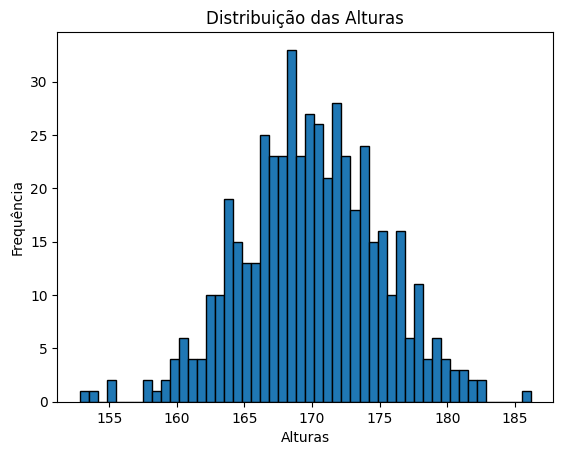

In [11]:
# Exercício prático

import numpy as np
import matplotlib.pyplot as plt

# np.random.normal(media, std, quantidade)
alturas = np.random.normal(170, 5, 500)

# Plotando o histograma das alturas
plt.hist(alturas, bins=50, edgecolor='black')
plt.xlabel('Alturas')
plt.ylabel('Frequência')
plt.title('Distribuição das Alturas')
plt.show()

## Tipos de Variáveis Aleatórias

### Fundamentos Teóricos

Existem dois tipos principais de variáveis aleatórias:

1. Variáveis aleatórias discretas: Essas variáveis assumem valores separados e distintos uns dos outros. Elas representam eventos que podem ser contados ou enumerados. Exemplos de variáveis aleatórias discretas incluem o número de caras em uma série de lançamentos de moeda e o número de defeitos em um processo industrial.

2. Variáveis aleatórias contínuas: Essas variáveis podem assumir qualquer valor em um intervalo contínuo de números reais. Elas representam eventos que podem ser medidos. Exemplos de variáveis aleatórias contínuas incluem a altura de uma pessoa e o tempo de vida de um dispositivo eletrônico.

### Exemplo em Python

Aqui está um exemplo de como gerar uma variável aleatória discreta em Python:

```python
import random

for i in range(10):
    print(random.randint(1, 6)) # Número aleatório entre 1 e 6
```

Neste exemplo, usamos a função `randint` do módulo `random` para gerar um número aleatório entre 1 e 6. O loop `for` é usado para gerar 10 números aleatórios.

### Exercício Prático em Python

Agora, vamos criar um exercício prático para aplicar o conceito de variáveis aleatórias discretas em Python.

**Exercício:** Crie um programa em Python que simule o lançamento de um dado 100 vezes e conte o número de vezes que cada face do dado aparece. Em seguida, exiba o resultado.

### Exercício Discursivo

**Exercício:** Explique a diferença entre variáveis aleatórias discretas e variáveis aleatórias contínuas. Dê exemplos de cada tipo de variável aleatória.

In [13]:
np.random.randint(1,6)

3

## Distribuições de Probabilidade

### Fundamentos Teóricos

Uma distribuição de probabilidade é uma função matemática que mapeia diferentes resultados de um experimento aleatório para suas respectivas probabilidades de ocorrência. As distribuições permitem prever comportamentos de variáveis aleatórias e fazer inferências estatísticas. Algumas distribuições comuns são:

- Normal
- Poisson
- Binomial
- Exponencial


## Principais Distribuições

Neste capítulo, vamos explorar algumas das distribuições de probabilidade mais importantes.

### Distribuição de Bernoulli

A distribuição de Bernoulli descreve o resultado de um experimento aleatório com apenas dois resultados possíveis, como sucesso/fracasso, cara/coroa, entre outros.

#### Fundamentos Teóricos

A distribuição de Bernoulli é caracterizada por um parâmetro p, que representa a probabilidade de sucesso em um único experimento. O valor esperado dessa distribuição é igual a p, e a variância é dada por p(1 - p).

#### Exemplo em Python

Vamos utilizar a biblioteca scipy.stats para criar uma distribuição de Bernoulli com p = 0.3.

```python
from scipy.stats import bernoulli

dist = bernoulli(p=0.3)

# Probabilidade de sucesso
print(dist.pmf(1)) # 0.3

# Valor esperado  
print(dist.mean()) # 0.3

# Variância
print(dist.var()) # 0.21
```

Neste exemplo, calculamos a probabilidade de sucesso (1) utilizando o método pmf da distribuição de Bernoulli. O valor esperado e a variância também são calculados utilizando os métodos mean() e var(), respectivamente.

#### Exercício Prático em Python

Crie uma distribuição de Bernoulli com p = 0.6 e calcule a probabilidade de sucesso (1), o valor esperado e a variância.


#### Exercício Discursivo

Explique a diferença entre o valor esperado e a variância em uma distribuição de Bernoulli.

In [14]:
from scipy.stats import bernoulli

dist = bernoulli(p=0.6)
print(dist.pmf(1))
print(dist.mean())
print(dist.var())

0.6
0.6
0.24


## Distribuição Binomial

### Fundamentos Teóricos

A distribuição binomial é utilizada para descrever o número de sucessos em n experimentos de Bernoulli independentes. Cada experimento de Bernoulli possui apenas dois resultados possíveis: sucesso ou fracasso. A distribuição binomial é caracterizada por dois parâmetros:

- n: número de experimentos
- p: probabilidade de sucesso em cada experimento

O valor esperado da distribuição binomial é dado por n * p, enquanto a variância é dada por n * p * (1 - p).

### Exemplo em Python
```python
from scipy.stats import binom

dist = binom(n=10, p=0.5)

# P(obter exatamente 5 sucessos)
print(dist.pmf(5)) # 0.246

# Valor esperado
print(dist.mean()) # 5  

# Variância  
print(dist.var()) # 2.5
```

### Exercício Prático em Python
Qual a probabilidade de obter exatamente 2 caras ao jogar uma moeda justa 4 vezes?

### Exercício Discursivo

Se lançarmos uma moeda justa 10 vezes, qual é a variância do número de caras?

In [16]:
from scipy.stats import binom

dist = binom(n=4, p=0.5)

# P(obter exatamente 2 caras)
print(dist.pmf(2))

0.375


## Distribuição de Poisson

### Fundamentos Teóricos

A distribuição de Poisson é utilizada para modelar a quantidade de eventos que ocorrem em um determinado intervalo de tempo, quando a taxa média de ocorrência desses eventos é conhecida. Ela é aplicada em situações em que os eventos ocorrem de forma independente e a taxa média de ocorrência é constante.

A distribuição de Poisson é caracterizada pelo parâmetro λ, que representa a taxa média de ocorrência dos eventos. O valor esperado e a variância dessa distribuição são iguais a λ.

A função de probabilidade de uma distribuição de Poisson é dada por:

P(X = k) = (e^(-λ) * λ^k) / k!

Onde:
- X é a variável aleatória que representa a quantidade de eventos ocorrendo em um determinado intervalo de tempo.
- k é o número de eventos que ocorrem nesse intervalo de tempo.
- e é a base do logaritmo natural, aproximadamente igual a 2.71828.

### Exemplo em Python

Vamos utilizar a biblioteca scipy.stats para trabalhar com a distribuição de Poisson em Python. A função poisson() dessa biblioteca permite criar uma distribuição de Poisson com um determinado valor de λ.

```python
from scipy.stats import poisson

dist = poisson(lam=5)

# P(exatamente 3 eventos)
print(dist.pmf(3)) # 0.16806

# Valor esperado
print(dist.mean()) # 5

# Variância
print(dist.var()) # 5
```

Nesse exemplo, criamos uma distribuição de Poisson com λ igual a 5. Em seguida, calculamos a probabilidade de ocorrer exatamente 3 eventos, o valor esperado e a variância dessa distribuição.

### Exercício Prático em Python

Utilizando a distribuição de Poisson, crie um programa em Python que resolva o seguinte exercício:

Um call center recebe em média 10 chamadas por minuto. Qual a probabilidade de receber exatamente 5 chamadas em um intervalo de 30 segundos?

### Exercício Discursivo

Explique em suas palavras o que é a distribuição de Poisson e como ela pode ser aplicada em situações reais.



## Distribuição Exponencial

### Fundamentos Teóricos

A distribuição exponencial é utilizada para modelar o tempo entre eventos, quando a taxa média de ocorrência desses eventos é conhecida. Ela é aplicada em situações em que os eventos ocorrem de forma independente e a taxa média de ocorrência é constante.

A distribuição exponencial é caracterizada pelo parâmetro λ, que representa a taxa média de ocorrência dos eventos. O valor esperado dessa distribuição é igual a 1/λ e a variância é igual a 1/λ^2.

A função de densidade de probabilidade (PDF) de uma distribuição exponencial é dada por:

f(x) = λ * e^(-λx)

Onde:
- x é a variável aleatória que representa o tempo entre eventos.
- e é a base do logaritmo natural, aproximadamente igual a 2.71828.

### Exemplo em Python

Vamos utilizar a biblioteca scipy.stats para trabalhar com a distribuição exponencial em Python. A função expon() dessa biblioteca permite criar uma distribuição exponencial com um determinado valor de λ.

```python
from scipy.stats import expon

dist = expon(scale=3)

# PDF em x = 4  
print(dist.pdf(4)) # 0.045

# Valor esperado
print(dist.mean()) # 3  

# Variância
print(dist.var()) # 9
```

Nesse exemplo, criamos uma distribuição exponencial com λ igual a 1/3. Em seguida, calculamos a função de densidade de probabilidade (PDF) para x igual a 4, o valor esperado e a variância dessa distribuição.

### Exercício Prático em Python

Utilizando a distribuição exponencial, crie um programa em Python que resolva o seguinte exercício:

O tempo entre chegadas de clientes em um estabelecimento segue uma distribuição exponencial com média de 10 minutos. Qual a probabilidade de o próximo cliente chegar em menos de 5 minutos?


### Exercício Discursivo

Explique em suas palavras o que é a distribuição exponencial e como ela pode ser aplicada em situações reais.

A distribuição exponencial é utilizada para modelar o tempo entre eventos, quando a taxa média de ocorrência desses eventos é conhecida. Ela é aplicada em situações em que os eventos ocorrem de forma independente e a taxa média de ocorrência é constante.